In [1]:
import numpy as np
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib

In [2]:
%store -r reso
%store -r xsize

In [3]:
%store -r data_Q_map_obs
%store -r data_U_map_obs

In [4]:
%store -r foreground_map_Q
%store -r foreground_map_U

In [5]:
data_Q_map_obs_foregrounds = data_Q_map_obs + foreground_map_Q
data_U_map_obs_foregrounds = data_U_map_obs + foreground_map_U

In [6]:
data_P_map_obs_foregrounds = np.sqrt(data_Q_map_obs_foregrounds**2 + data_U_map_obs_foregrounds**2)

In [34]:
# Centers of patches for 3.63º x 3.63º (https://arxiv.org/abs/1909.04701)
df = pd.read_csv("lon_lat13deg2.txt", header=None, delim_whitespace=True, names=["lon", "lat"]) 
coords = np.array(df)
lon = coords[:,0]
lat = coords[:,1]

In [35]:
map_cut_data_P_obs_foregrounds = [hp.gnomview(data_P_map_obs_foregrounds, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [36]:
map_cut_data_Q_obs_foregrounds = [hp.gnomview(data_Q_map_obs_foregrounds, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [37]:
map_cut_data_U_obs_foregrounds = [hp.gnomview(data_U_map_obs_foregrounds, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [38]:
# Convert to array to then reshape
map_cut_data_P_obs_foregrounds = np.array(map_cut_data_P_obs_foregrounds)
map_cut_data_Q_obs_foregrounds = np.array(map_cut_data_Q_obs_foregrounds)
map_cut_data_U_obs_foregrounds = np.array(map_cut_data_U_obs_foregrounds)

In [39]:
# Reshape data and labels
def reshape(array):
    N = len(array)
    return np.reshape(array, (N, xsize, xsize, 1))
map_cut_data_P_obs_foregrounds = reshape(map_cut_data_P_obs_foregrounds)
map_cut_data_Q_obs_foregrounds = reshape(map_cut_data_Q_obs_foregrounds)
map_cut_data_U_obs_foregrounds = reshape(map_cut_data_U_obs_foregrounds)

In [40]:
map_cut_data_QU_obs_foregrounds = np.concatenate((map_cut_data_Q_obs_foregrounds, map_cut_data_U_obs_foregrounds), axis = -1)

In [41]:
%store map_cut_data_QU_obs_foregrounds
%store map_cut_data_P_obs_foregrounds

Stored 'map_cut_data_QU_obs_foregrounds' (ndarray)
Stored 'map_cut_data_P_obs_foregrounds' (ndarray)


#### **EB**

In [56]:
%store -r data_E_map_obs
%store -r data_B_map_obs

In [57]:
%store -r foreground_map_E
%store -r foreground_map_B

In [58]:
data_E_map_obs_foregrounds = data_E_map_obs + foreground_map_E
data_B_map_obs_foregrounds = data_B_map_obs + foreground_map_B

In [59]:
map_cut_data_E_obs_foregrounds = [hp.gnomview(data_E_map_obs_foregrounds, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [60]:
map_cut_data_B_obs_foregrounds = [hp.gnomview(data_B_map_obs_foregrounds, rot=[lon[i], lat[i]], xsize = xsize, reso = reso, return_projected_map = True, no_plot = True) for i in range(len(coords))]

In [61]:
map_cut_data_E_obs_foregrounds = np.array(map_cut_data_E_obs_foregrounds)
map_cut_data_B_obs_foregrounds = np.array(map_cut_data_B_obs_foregrounds)

In [62]:
map_cut_data_E_obs_foregrounds = reshape(map_cut_data_E_obs_foregrounds)
map_cut_data_B_obs_foregrounds = reshape(map_cut_data_B_obs_foregrounds)

In [63]:
map_cut_data_EB_obs_foregrounds = np.concatenate((map_cut_data_E_obs_foregrounds, map_cut_data_B_obs_foregrounds), axis = -1)

In [64]:
%store map_cut_data_EB_obs_foregrounds
%store map_cut_data_B_obs_foregrounds
%store map_cut_data_E_obs_foregrounds

Stored 'map_cut_data_EB_obs_foregrounds' (ndarray)
Stored 'map_cut_data_B_obs_foregrounds' (ndarray)
Stored 'map_cut_data_E_obs_foregrounds' (ndarray)


#### **Visualisation of the foregrounds**

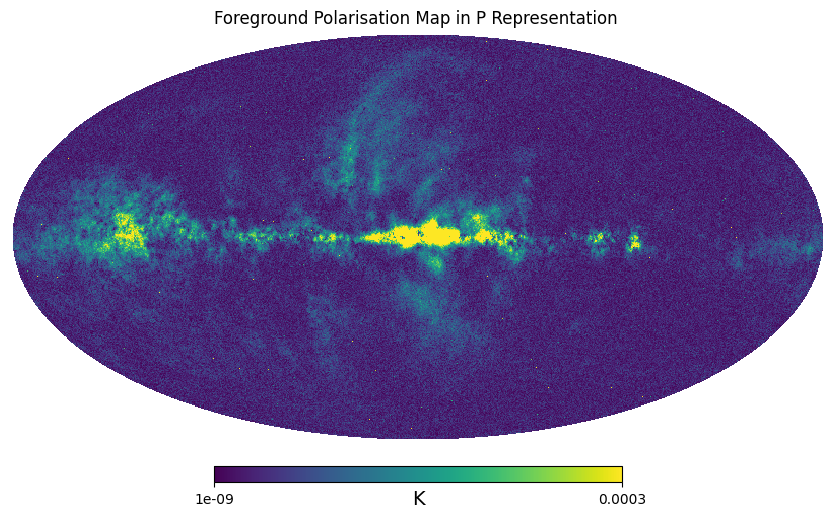

In [7]:
hp.mollview(data_P_map_obs_foregrounds, title='Foreground Polarisation Map in P Representation ', unit='K', min = 10e-10, max =0.0003 )
matplotlib.rcParams.update({'font.size':13})
plt.savefig('polarization_map_with_foregrounds.png', dpi=200)
plt.show()

